# Principal Component Analysis

## Exercise 1.1: PCA: 2-dimensional Toy Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("pca-data-2d.dat", names=["x", "y"], header=None, sep=r"\s+")
df.head()

,x,y
0,2.4,-2.5
1,0.7,-0.5
2,2.9,-2.2
3,2.2,-1.9
4,3.0,-3.1


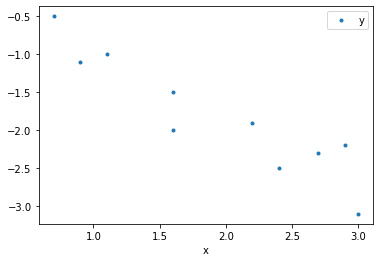

In [2]:
df.plot(x="x", y="y", style=".")

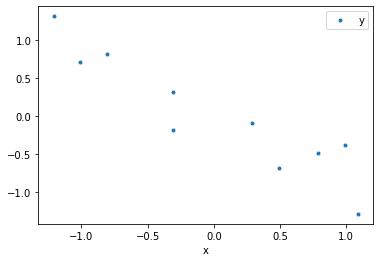

In [3]:
df_cent = df - df.mean()
df_cent.plot(x="x", y="y", style=".")

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
print("Components:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Sigular values:", pca.singular_values_)

Components: [[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]
Explained variance: [1.28402771 0.0490834 ]
Explained variance ratio: [0.96318131 0.03681869]
Sigular values: [3.3994484  0.66464321]


,x,y
0,-0.827970,-0.175115
1,1.777580,0.142857
2,-0.992197,0.384375
3,-0.274210,0.130417
4,-1.675801,-0.209498
5,-0.912949,0.175282
6,0.099109,-0.349825
7,1.144572,0.046417
8,0.438046,0.017765
9,1.223821,-0.162675


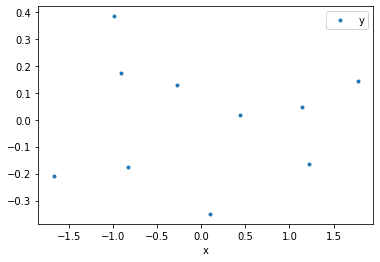

In [5]:
data_pca = pca.transform(df)
df_comp = pd.DataFrame(data_pca, index=df.index, columns=df.columns)
df_comp.plot(x="x", y="y", style=".")
df_comp

In [6]:
df_cent.dot(pca.components_)

,0,1
0,-0.827970,-0.175115
1,1.777580,0.142857
2,-0.992197,0.384375
3,-0.274210,0.130417
4,-1.675801,-0.209498
5,-0.912949,0.175282
6,0.099109,-0.349825
7,1.144572,0.046417
8,0.438046,0.017765
9,1.223821,-0.162675


      0     1
0  0.49 -0.69
1 -1.21  1.31
2  0.99 -0.39
3  0.29 -0.09
4  1.09 -1.29
5  0.79 -0.49
6 -0.31 -0.19
7 -0.81  0.81
8 -0.31  0.31
9 -1.01  0.71


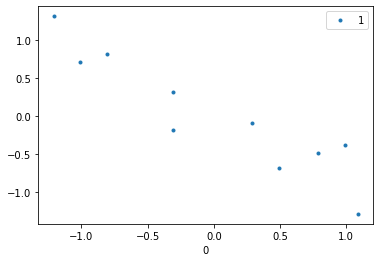

In [7]:
Z_orig = df_comp.dot(pca.components_.T)
print(Z_orig)
Z_orig.plot(x=0, y=1, style=".")

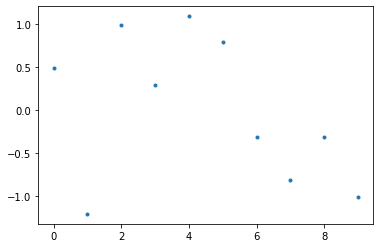

In [8]:
Z_1 = df_comp.dot(pca.components_[0].T)
Z_1.plot(x=0, y=1, style=".")

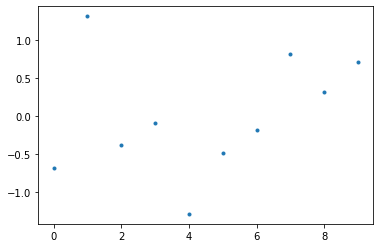

In [9]:
Z_2 = df_comp.dot(pca.components_[1].T)
Z_2.plot(x=0, y=1, style=".")

In [10]:
M = pca.components_.T
X = df_cent.to_numpy().T
U = np.dot(M.T, X)

In [11]:
# Note: np.dot(np.linalg.inv(pca.components_.T), U) == np.dot(pca.components_, U), because M is orthogonal matrix
Xtilde = np.dot(pca.components_.T, U)
print(Xtilde)

[[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]
 [-0.69  1.31 -0.39 -0.09 -1.29 -0.49 -0.19  0.81  0.31  0.71]]


In [12]:
print(np.dot(np.linalg.inv(M), M.T))
print(np.dot(M, M.T))

[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]
[[ 1.00000000e+00 -2.37882179e-17]
 [-2.37882179e-17  1.00000000e+00]]


In [13]:
print("M.T", M.T[:1].shape)
print("M", M[:,:1].shape)
print("X", X.shape)
U_1 = np.dot(M.T[:1], X)
print("U_1", U_1.shape)
Xtilde_1 = np.dot(M[:,:1], U_1)
print("Xtilde", Xtilde_1.shape)
print(Xtilde_1)

M.T (1, 2)
M (2, 1)
X (2, 10)
U_1 (1, 10)
Xtilde (2, 10)
[[ 0.60870601 -1.30683911  0.72944242  0.20159364  1.23201343  0.67118069
  -0.07286314 -0.84146502 -0.32204217 -0.89972675]
 [-0.56125896  1.20497442 -0.67258429 -0.18587995 -1.1359812  -0.61886391
   0.06718365  0.77587502  0.29693982  0.8295954 ]]


In [14]:
pca_1 = PCA(n_components=1)
pca_1.fit(df)
print("Components:", pca_1.components_)
print("Explained variance:", pca_1.explained_variance_)
print("Explained variance ratio:", pca_1.explained_variance_ratio_)
print("Sigular values:", pca_1.singular_values_)

Components: [[-0.73517866  0.6778734 ]]
Explained variance: [1.28402771]
Explained variance ratio: [0.96318131]
Sigular values: [3.3994484]


,x,y
0,-0.827970,-0.175115
1,1.777580,0.142857
2,-0.992197,0.384375
3,-0.274210,0.130417
4,-1.675801,-0.209498
5,-0.912949,0.175282
6,0.099109,-0.349825
7,1.144572,0.046417
8,0.438046,0.017765
9,1.223821,-0.162675


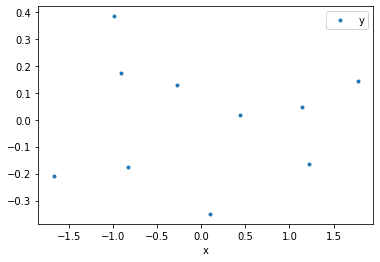

In [15]:
data_pca_1 = pca.transform(df)
df_comp_1 = pd.DataFrame(data_pca_1, index=df.index, columns=df.columns)
df_comp_1.plot(x="x", y="y", style=".")
df_comp_1

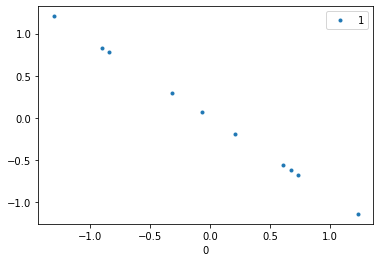

In [16]:
nComp = 1
Xhat = np.dot(pca.transform(df)[:,:nComp], pca.components_[:nComp,:])
pd.DataFrame(Xhat).plot(x=0, y=1, style=".")

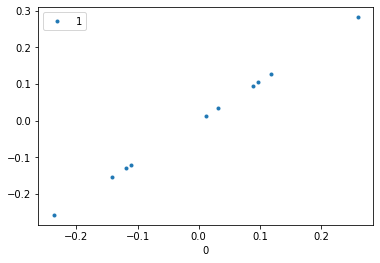

In [17]:
Xhat = np.dot(pca.transform(df)[:,1:2], pca.components_[1:2,:])
pd.DataFrame(Xhat).plot(x=0, y=1, style=".")

## Exercise 1.2: PCA: 3-dimensional Toy Data

In [18]:
from pandas.plotting import scatter_matrix

df = pd.read_csv("pca-data-3d.txt")
dfc = df - df.mean()
dfc.head()

FileNotFoundError: [Errno 2] File pca-data-3d.txt does not exist: 'pca-data-3d.txt'

In [ ]:
scatter_matrix(dfc)

In [ ]:
import numpy.linalg as LA

C = dfc.cov()
e, M = LA.eig(C)
print(e)
print(M)

In [ ]:
sort_perm = e.argsort()[::-1]
print(sort_perm)
e = e[sort_perm]
M = M[:,sort_perm]
print(e)
print(M)

In [ ]:
np.dot(M.T[:2], dfc.T)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        if (i == j):
            ax[i, j].text(0, 0, f"PC{i}")
            continue
        U = np.dot(M.T[[i,j], :], dfc.T)
        x, y = (U[0], U[1])
        ax[i, j].plot(x, y, ".")

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=plt.figaspect(1/3))

for i in range(1, 3 + 1):
    Xhat = LA.multi_dot([M[:,:i], M.T[:i], dfc.T])
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(dfc["x"], dfc["y"], dfc["z"], c="r")
    ax.scatter(Xhat[0], Xhat[1], Xhat[2], c="b")


## Exercise 1.3: Projections of a dynamical system

In [ ]:
df = pd.read_csv("expDat.txt", index_col=0)
df.head()

In [ ]:
import numpy.linalg as LA

dfc = df - df.mean()
X = dfc.T.values
C = np.cov(X)
e, M = LA.eig(C)
print(e)
print(M)

In [ ]:
sort_perm = (-e).argsort()
e = e[sort_perm]
M = M[:,sort_perm]
print(e)
print(M)

In [ ]:
U_12 = np.dot(M.T[:2], X)
x = np.arange(1, 100 + 1)

fig, ax = plt.subplots()
ax.scatter(U_12[0], U_12[1], c=x, cmap="plasma")

In [ ]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()

norm = plt.Normalize(x.min(), x.max())

# Plot first line

# TODO: understand this
points = np.array([x, U_12[0]]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]], axis=1)

lc = LineCollection(segments, cmap='plasma', norm=norm)
lc.set_array(x)
lc.set_linewidth(2)

# Set the values used for colormapping
line = ax.add_collection(lc)

# Plot second line

points = np.array([x, U_12[1]]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]], axis=1)

lc = LineCollection(segments, cmap='plasma', norm=norm)
lc.set_array(x)
lc.set_linewidth(2)

# Set the values used for colormapping
ax.set_xlim(x.min(), x.max())
ax.set_ylim(U_12.min(), U_12.max())
line = ax.add_collection(lc)

In [ ]:
Xr = np.apply_along_axis(np.random.permutation, 1, X)

In [ ]:
all([sorted(X[i]) == sorted(Xr[i]) for i in np.arange(X.shape[0])])

In [ ]:
Cr = np.cov(Xr)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 16))

im1 = ax1.imshow(np.cov(X))
im2 = ax2.imshow(Cr)

In [ ]:
er, Mr = LA.eig(Cr)
sort_perm = (-e).argsort()
e = e[arg_sort]
Mr = Mr[:,sort_perm]

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,10))

ax1.plot(np.arange(e.size), e, "o-")
ax2.plot(np.arange(er.size), er, "o-")

## Exercise 1.4: Image data compression and reconstruction

In [ ]:
import os
from PIL import Image

pca_img_dir = "imgpca"
pca_imgs = os.listdir(pca_img_dir)
nature_imgs = [Image.open(f"{pca_img_dir}/{image}") for image in img_dir if image.startswith("n")]
building_imgs = [Image.open(f"{pca_img_dir}/{image}") for image in img_dir if image.startswith("b")]

In [ ]:
from sklearn.feature_extraction.image import extract_patches_2d

num_patches = 500
patch_dimensions = (16, 16)

nature_patches = np.concatenate([extract_patches_2d(np.asarray(img), patch_dimensions, max_patches=num_patches) for img in nature_imgs])
nature_patches = nature_patches.T.reshape(256, -1)
print(nature_patches.shape)
building_patches = np.concatenate([extract_patches_2d(np.asarray(img), patch_dimensions, max_patches=num_patches) for img in building_imgs])
building_patches = building_patches.T.reshape(256, -1)
print(building_patches.shape)

In [ ]:
fig, ax = plt.subplots()
patch = extract_patches_2d(np.asarray(nature_imgs[0]), patch_dimensions, max_patches=1)[0]
ax.imshow(patch, cmap="gray")

In [ ]:
fig, ax = plt.subplots()
patch = nature_patches[:,0].reshape(16, 16)
ax.imshow(patch, cmap="gray")

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(10,5))
for i in np.arange(24):
    nature_patch_2d = nature_patches[:,i].reshape(16, 16)
    im = axs.flat[i].imshow(nature_patch_2d, cmap="gray")

In [ ]:
Cn = np.cov(nature_patches)
en, Mn = LA.eig(Cn)
sort_perm_n = (-en).argsort()
en = en[sort_perm_n]
Mn = Mn[:,sort_perm_n]
Mn.shape

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(20, 10))

for i in np.arange(24):
    pc = Mn[:,i]
    pc_2d = pc.reshape(16,16)
    im = axs.flat[i].imshow(pc_2d, cmap="gray")

In [ ]:
Cb = np.cov(building_patches)
eb, Mb = LA.eig(Cb)
sort_perm_b = (-eb).argsort()
eb = eb[sort_perm_b]
Mb = Mb[:,sort_perm_b]
Mb.shape

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(20, 10))

for i in np.arange(24):
    pc = Mb[:,i]
    pc_2d = pc.reshape(16,16)
    im = axs.flat[i].imshow(pc_2d, cmap="gray")

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,10))

ax1.plot(np.arange(en.size), en, "o-")
ax2.plot(np.arange(eb.size), eb, "o-")

In [ ]:
pd.DataFrame(en/float(np.sum(en))).applymap(lambda x: '{:.2%}'.format(x)).values

In [ ]:
pd.DataFrame(eb/float(np.sum(eb))).applymap(lambda x: '{:.2%}'.format(x)).values

In [ ]:
# https://stackoverflow.com/a/16858283
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array looks like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

# https://stackoverflow.com/a/16873755
def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [ ]:
num_imgs = 3

sample_nature_imgs = np.array([np.asarray(img) for img in nature_imgs[:num_imgs]])
print(sample_nature_imgs.shape)

sample_nature_img_patches = np.zeros(sample_nature_imgs.reshape(num_imgs, -1, 16, 16).shape)
for i in np.arange(num_imgs):
    sample_nature_img_patches[i] = blockshaped(sample_nature_imgs[i], 16, 16)

In [ ]:
fig, ax = plt.subplots()

ax.imshow(unblockshaped(sample_nature_img_patches[0], sample_nature_imgs[0].shape[0], sample_nature_imgs[0].shape[1]), cmap="gray")

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(10,5))

for i in np.arange(24):
    patch = sample_nature_img_patches[0][i]
    im = axs.flat[i].imshow(patch, cmap="gray")

In [ ]:
num_of_pcs_list = [1, 2, 4, 8, 16, 100]

sample_nature_img_patches_recon = np.zeros(sample_nature_img_patches.shape)
for i in np.arange(num_imgs):
    img_patches = sample_nature_img_patches[i]
    img_patches_flat = img_patches.reshape(img_patches.shape[0], -1)
    patches_recon_flat = LA.multi_dot([Mn[:,:4], Mn.T[:4], img_patches_flat.T]).T
    patches_recon = patches_recon_flat.reshape(img_patches.shape[0], 16, 16)
    sample_nature_img_patches_recon[i] = patches_recon

In [ ]:
fig, ax = plt.subplots()

ax.imshow(unblockshaped(sample_nature_img_patches_recon[0], sample_nature_imgs[0].shape[0], sample_nature_imgs[0].shape[1]), cmap="gray")

In [ ]:
def reconstruct_patches(img_patches, num_of_pcs, M):
    img_patches_flat = img_patches.reshape(img_patches.shape[0], -1)
    patches_recon_flat = LA.multi_dot([Mn[:,:num_of_pcs], Mn.T[:num_of_pcs], img_patches_flat.T]).T
    patches_recon = patches_recon_flat.reshape(img_patches.shape[0], 16, 16)
    return patches_recon

def plot_reconstruction(img_patches, num_of_pcs_list, M):
    fig, axs = plt.subplots(nrows=1, ncols=len(num_of_pcs_list) + 1, figsize=(30,10))
    width = img_patches.shape[0]
    height = img_patches.shape[1] * img_patches.shape[2]

    # Plot original image at end of row
    orig_img = unblockshaped(img_patches, height, width)
    im = axs.flat[len(num_of_pcs_list)].imshow(orig_img, cmap="gray")
    
    # Plot reconstructions of image
    for i in np.arange(len(num_of_pcs_list)):
        patches_recon = reconstruct_patches(img_patches, num_of_pcs_list[i], M)
        recon_img = unblockshaped(patches_recon, height, width)
        im = axs.flat[i].imshow(recon_img, cmap="gray")
        

In [ ]:
for patches in sample_nature_img_patches:
    plot_reconstruction(patches, num_of_pcs_list, Mn)

In [ ]:
for patches in sample_nature_img_patches:
    plot_reconstruction(patches, num_of_pcs_list, Mb)

In [ ]:
for patches in sample_nature_img_patches:
    plot_reconstruction(patches, num_of_pcs_list, Mn)